In [ ]:
# Pip install all the packages if you need:
!pip install -r Scripts/requirements.txt

In [1]:
# Import all packages
import os 
from docx2python import docx2python
import PyPDF2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import date
from textwrap import wrap
import re

In [2]:
# Provide a path to the folder containing portfolios
folder_path = 'PORTFOLIOS TO SCAN/'
Read_Folder = os.listdir(folder_path)

# Create a path for output folder, this is where the images will be saved to 
output_path = 'OUTPUTS/'

In [3]:
# Preview all the files found in the folder path 
for file in Read_Folder:
    print(file)

Claire_Mawditt_Portfolio_FINAL_2022.docx
Joanna_Konerska_Harry_Gulliver_February_Portfolio.docx
sarah_oneill_February_portfolio_feedback.docx
Test portfolio.docx


In [4]:
# Read in all the files - check the outputs
n = 1
portfolios = {}
word_files = []
pdf_files = []
failed_files = []
learner_names = []
pdf_text_list = []

for file in Read_Folder:
    if file.lower().endswith(('.docx', '.doc')): # If the file ends with a .docx or .doc extension.... 
        portfolios[f'portfolio_{n}'] = docx2python(f'{folder_path}{file}').text # read the text, and store it in a dict
        word_files.append(file) # append the name of the file to the word list 
        learner_names.append(file) # append the name of the file to learner names 
        n += 1 # add one to n 
    elif file.lower().endswith(('.pdf')): # If the file ends with a .pdf extension... 
        x = PyPDF2.PdfFileReader(f'{folder_path}{file}') # read the file and store as an obj called x 
        for page in range(x.getNumPages()): # for each page in the x obj...
            pdf_text_list.append(x.getPage(page).extractText()) # ... extract the text and append to a pdf_list 
            
        portfolios[f'portfolio_{n}'] = '\n'.join(pdf_text_list) # Once the loop is complete, append this to the dict 
        pdf_files.append(file) # append the name of the file to the pdf list 
        learner_names.append(file) # append the name of the file to the learner names list
        pdf_text_list.clear() # clear the pdf list object, this is needed in time for the next loop 
        n += 1 # add one to n 
    else:
        failed_files.append(file) # if the file isn't a .docx or .pdf file, append it to the failed_files list 

# Print your output message to QA
print('---- SUMMARY OF IMPORT ---- \n')
print('-- Successful Word files -- ')
for file in word_files: 
    print(file)
print('\n')
print('-- Successful PDF files -- ')
for file in pdf_files: 
    print(file)
print('\n')
print(' -- Failed files -- ')
for file in failed_files: 
    print(file)


---- SUMMARY OF IMPORT ---- 

-- Successful Word files -- 
Claire_Mawditt_Portfolio_FINAL_2022.docx
Joanna_Konerska_Harry_Gulliver_February_Portfolio.docx
sarah_oneill_February_portfolio_feedback.docx
Test portfolio.docx


-- Successful PDF files -- 


 -- Failed files -- 


In [5]:
# Run the portfolios through a for loop to remove new line breaks '\n' this is needed to correctly count standards.
for portfolio in portfolios: 
    portfolios[portfolio] = portfolios[portfolio].replace('\n', '')

In [6]:
# Define the TCs
TCs = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6', 'TC7', 'TC8', 'TC9', 'TC10', 'TC11', 'TC12']

In [7]:
# Define the SABs
SABs = ['SAB1', 'SAB2', 'SAB3', 'SAB4', 'SAB5', 'SAB6', 'SAB7', 'SAB8']

In [8]:
# Combine the TCs and SABs list 
standards = TCs + SABs

In [9]:
# Instantiate the patterns for TCs and SABs using regex 
pattern_TC = r"TC+\d+"
pattern_SAB = r"SAB+\d+"

# Store these patterns in a list 
patterns = [pattern_TC, pattern_SAB]

# Create a function to count each standard 
def Find_Standards(portfolio, standard, pattern):    
    found = re.findall(pattern, portfolio, flags=re.IGNORECASE)
    return found.count(standard)

# Create a function that counts each standard and returns it in a dictionary 
def Populate_Standards(portfolios, standards, pattern):      
    Standards_counts = {}
    Standards_dict = {}
    for portfolio in portfolios:        
        for standard in standards:
            Standards_dict[standard] = Find_Standards(portfolios[portfolio], standard, pattern)
            Standards_counts[portfolio] = Standards_dict.copy()
    Standards_dict.clear() 
    return Standards_counts

# Create a function that converts the dictionary to a pandas data frame 
def Dict_to_Frames():
    Standards_dict1 = Populate_Standards(portfolios, TCs, pattern_TC)
    Standards_dict2 = Populate_Standards(portfolios, SABs, pattern_SAB)
    ST_checker1 = pd.DataFrame(Standards_dict1).transpose().reset_index().rename(columns = {'index' : 'Portfolio'})
    ST_checker1['Name'] = learner_names
    ST_checker2 = pd.DataFrame(Standards_dict2).transpose().reset_index().rename(columns = {'index' : 'Portfolio'})
    ST_checker2['Name'] = learner_names
    frames = [ST_checker1, ST_checker2]
    df = pd.concat(frames, axis = 1) #outer join the two frames together
    ST_checker = df.loc[:,~df.columns.duplicated()] #remove duplicate columns

    # Reorder the columns
    ST_checker = ST_checker[['Portfolio'] + ['Name'] + standards]
    return ST_checker

# Run the function and store the output as ST_checker
ST_checker = Dict_to_Frames()

In [10]:
# Change the dimensions of the display to show all the columns and all the rows
pd.set_option('display.max_rows', ST_checker.shape[0])
pd.set_option('display.max_columns', ST_checker.shape[1])

# Print the full table - for coach use :D 
ST_checker

,Portfolio,Name,TC1,TC2,TC3,TC4,TC5,TC6,TC7,TC8,TC9,TC10,TC11,TC12,SAB1,SAB2,SAB3,SAB4,SAB5,SAB6,SAB7,SAB8
0,portfolio_1,Claire_Mawditt_Portfolio_FINAL_2022.docx,12,4,3,6,4,4,18,14,7,6,8,9,19,13,18,13,17,14,10,14
1,portfolio_2,Joanna_Konerska_Harry_Gulliver_February_Portfo...,16,3,7,5,12,8,14,10,6,6,12,5,21,9,8,9,6,5,8,16
2,portfolio_3,sarah_oneill_February_portfolio_feedback.docx,6,0,5,3,4,4,11,12,1,3,2,5,18,4,5,7,5,8,7,9
3,portfolio_4,Test portfolio.docx,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
def standards_plot(portfolio, save = True):
    # Create plotting space and axis
    fig = plt.figure(figsize = (25,32))
    ax0 = fig.add_subplot(2,1,1)
    ax1 = fig.add_subplot(2,1,2) 
    # Import the logo header to sit above the plot, plot on ax0 
    logo = plt.imread('Scripts/MV Header JPEG.jpg')
    implot = ax0.imshow(logo)
    # Choose colour mapping to fill the column headers
    col_colors = plt.cm.YlGnBu(np.full(5, 0.99))
    # Load in the font Rubrik for the plotting, both size 50, size 26 and size 26 bold
    prop50 = fm.FontProperties(fname = 'Scripts/Rubrik_1.otf', size = 50)
    prop26 = fm.FontProperties(fname = 'Scripts/Rubrik_1.otf', size = 26)
    prop26bold = fm.FontProperties(fname = 'Scripts/Rubik-ExtraBold.ttf', size = 26)
    # Create a function for the colour scheme 
    def colour_finder(x): 
        if x > 10:
            return 'w'
        elif x > 5:
            return 'moccasin'
        else: 
            return 'palevioletred'
    #  Convert the visual to a df so they can be coloured
    values_df = ST_checker[ST_checker['Portfolio'] == portfolio].iloc[:, 2:].transpose().reindex(standards).reset_index()
    TC_table = values_df.iloc[0:len(TCs)] # Select the first 12 rows for the TCs
    SAB_table = values_df.iloc[len(TCs):].reset_index() # Select the remaining rows for the SABs
    Full_standards = TC_table.join(SAB_table, lsuffix = 'TC', rsuffix = 'SAB') # Join the SAB and TC tables next to eachother
    Full_standards['level_0'] = 0 # Fill the middle column with 0's
    Full_standards.columns = ['TCs', 'TC Count', 'Empty', 'SABs', 'SAB Count'] # rename columns 
    Full_standards.fillna(8888, inplace = True) # fill na's with 0
    Full_standards['SAB Count'] = Full_standards['SAB Count'].astype(int) # convert the SAB counter to an integer type 
    colour_df = Full_standards.copy() # Copy the data frame to colours, this is needed for colour assignmen as we need int dtypes
    Full_standards.replace(8888, '', inplace = True) # replace the 0's with an empty string
    Full_standards['Empty'] = '' # Replace the middle column with an empty string 
    values = Full_standards.values # Store the output in a numpry array, needed for the table plot 
    # Assign the colours for the plot     
    colour_df['TCs'] = colour_df['TC Count'].apply(colour_finder)
    colour_df['TC Count'] = colour_df['TC Count'].apply(colour_finder)
    colour_df['SABs'] = colour_df['SAB Count'].apply(colour_finder)
    colour_df['SAB Count'] = colour_df['SAB Count'].apply(colour_finder)
    colour_df['Empty'] = 'w'
    # Convert the df back into an array for the table plot
    colors = colour_df.values

    # Plot the table
    table_plot = ax1.table(cellText = values, colLabels = ['TCs', 'TC Count', '', 'SABs', 'SAB Count'], 
                       loc = 'center', cellLoc = 'center', colColours = col_colors, 
                       cellColours = colors)

    # Find the header values & make them bold
    header1 = table_plot.get_celld()[(0,0)]
    header2 = table_plot.get_celld()[(0,1)]
    header4 = table_plot.get_celld()[(0,3)]
    header5 = table_plot.get_celld()[(0,4)]

    for cell in table_plot.get_celld():
        table_plot.get_celld()[cell[0], cell[1]].set_text_props(fontproperties = prop26) # Put all the cells in Rubik 
        if cell[1] == 2: # 2 corresponds to the 2'd column (i.e. column 3 as 0 index) 
            table_plot.get_celld()[cell[0], cell[1]].set_edgecolor('white') # IF this is true, set the boarders to white 
        
    header1.set_text_props(weight = 'bold', fontproperties = prop26bold, color = 'white')
    header2.set_text_props(weight = 'bold', fontproperties = prop26bold, color = 'white')
    header4.set_text_props(weight = 'bold', fontproperties = prop26bold, color = 'white')
    header5.set_text_props(weight = 'bold', fontproperties = prop26bold, color = 'white')

    # Make middle column white and remove boarders
    header3 = table_plot.get_celld()[(0,2)]
    header3.set_facecolor("#FFFFFF")
    
    # Do the same but for missing SABs 
    missing_SABs = [(9,3), (9,4), (10,3), (10,4), (11,3), (11,4), (12,3), (12,4)] #These are the cell coordinates for the SABs

    for cell in missing_SABs: # run the middle cells through a forloop to change all their boarders white 
        table_plot.get_celld()[cell[0], cell[1]].set_edgecolor('white')
        
    # Make the important TCs of TC5, TC6, TC7 and TC9 in bold
    important_TCs = [(5,0), (5,1), (6,0), (6,1), (7,0), (7,1), (9,0), (9,1)]
    for cell in important_TCs: # run the important TCs through a for loop to make them bold 
        table_plot.get_celld()[cell[0], cell[1]].set_text_props(fontproperties = prop26bold)

    # Add the line on the right of the TC table and bottom of the SAB table   
    ax1.axvline(x = 0.4, color = 'black', ymin = 0.009, ymax = 0.993)
    ax1.axhline(y = 0.31, color = 'black', xmin = 0.6)

    ax1.axis('off') # remove matplot lib axis
    ax0.axis('off') # remove matplot lib axis
    plt.box(on = None) # remove matplotlib box
    table_plot.auto_set_font_size(False) # remove auto font
    table_plot.set_fontsize(40) # adjust font size so it's readable
    table_plot.scale(1, 5) # rescale the table to make it bigger
    # Add text/title for the plot 
    plt.text(x = 0.51, y = 1.1, fontsize = 50, ha = 'center', fontproperties = prop50,
         s = "\n".join(wrap('A frequency count of how many times each TC and SAB is referenced within your portfolio.', 
                           width = 62)))
    # Add the commentary text in the bottom right corner 
    plt.text(x = 0.6, y = 0.03, fontsize = 26, ha = 'left', fontproperties = prop26,
         s = "Red: TC or SAB mentioned less than 5 times" +  "\n" + 
             "Amber: TC or SAB mentioned less than 10 times." + "\n" + 
             "White: TC or SAB mentioned more than 10 times." + "\n" + "\n" + 
             "For your portfolio to pass you MUST demonstrate:" + "\n" + "\n" +  
             "- A SQL or Database project (i.e. TC4 and TC5)" + "\n" + 
             "- A Dashboard or visualisation project (i.e. TC9)" + "\n" + 
             "- A linear OR logistic regressin project (i.e. TC6)" + "\n" + 
             "- A Time series project (i.e. TC7)")

    plt.tight_layout()
    # Save the plot option
    today = date.today()
    year = today.year
    month = today.strftime("%b")
    day = today.day
    name = ST_checker[ST_checker['Portfolio'] == portfolio]['Name'].iloc[0][0:10].upper()
    if save == True: 
        plt.savefig(f'{output_path}{name} feedback table {day}-{month}-{year}.jpg', bbox_inches = 'tight')


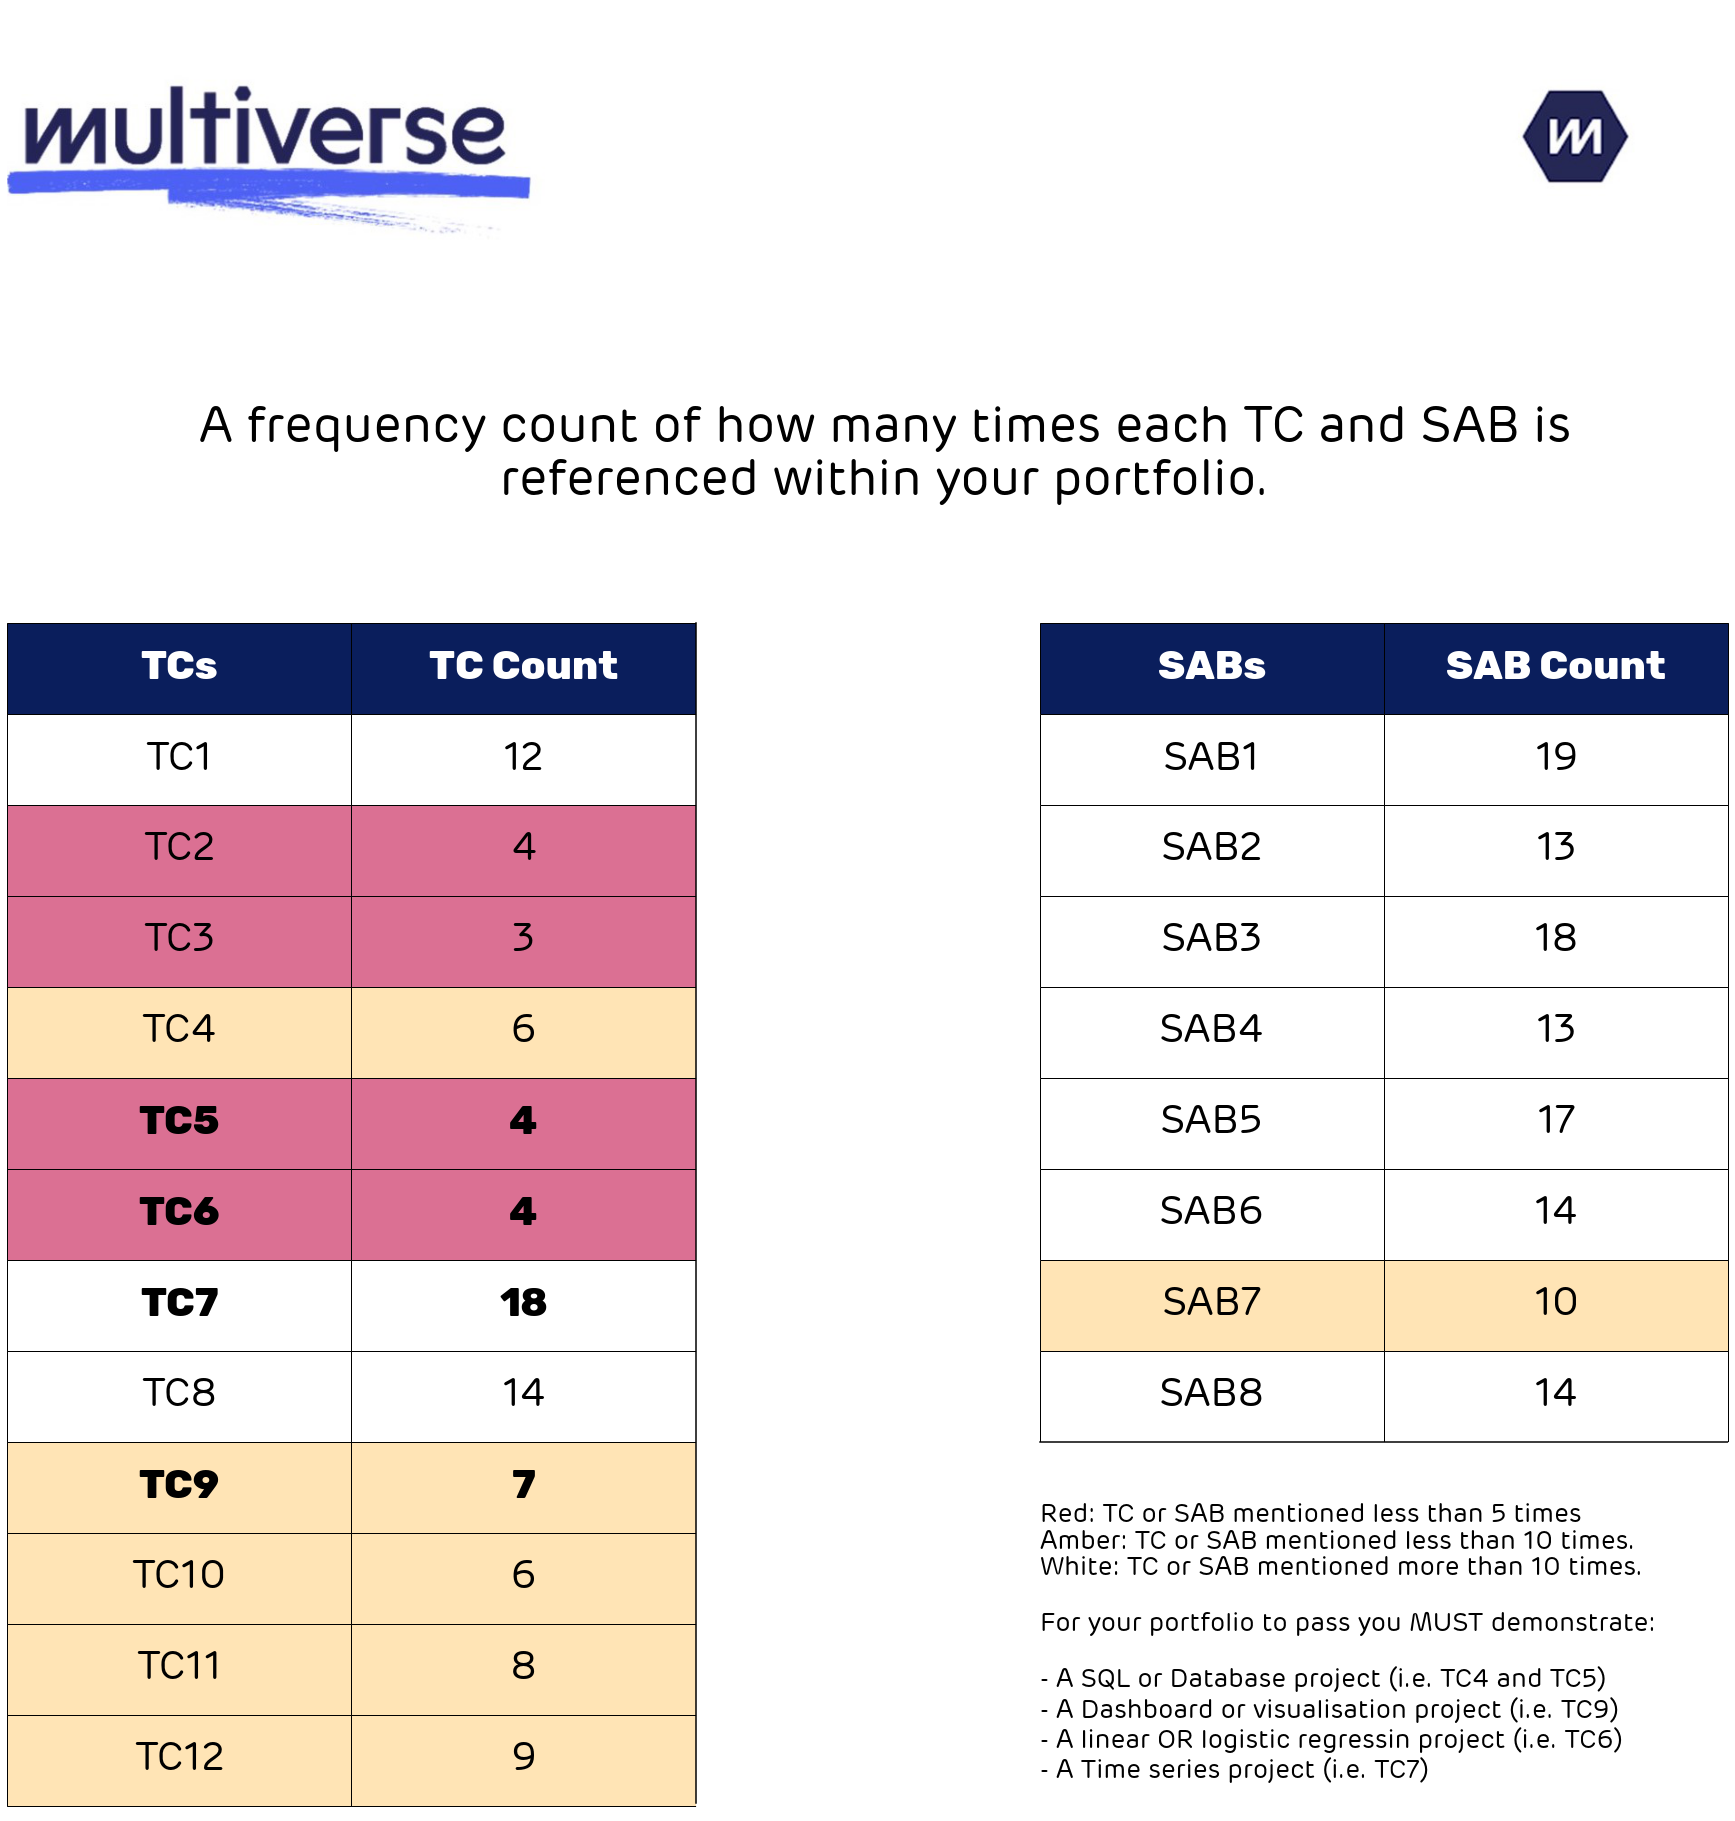

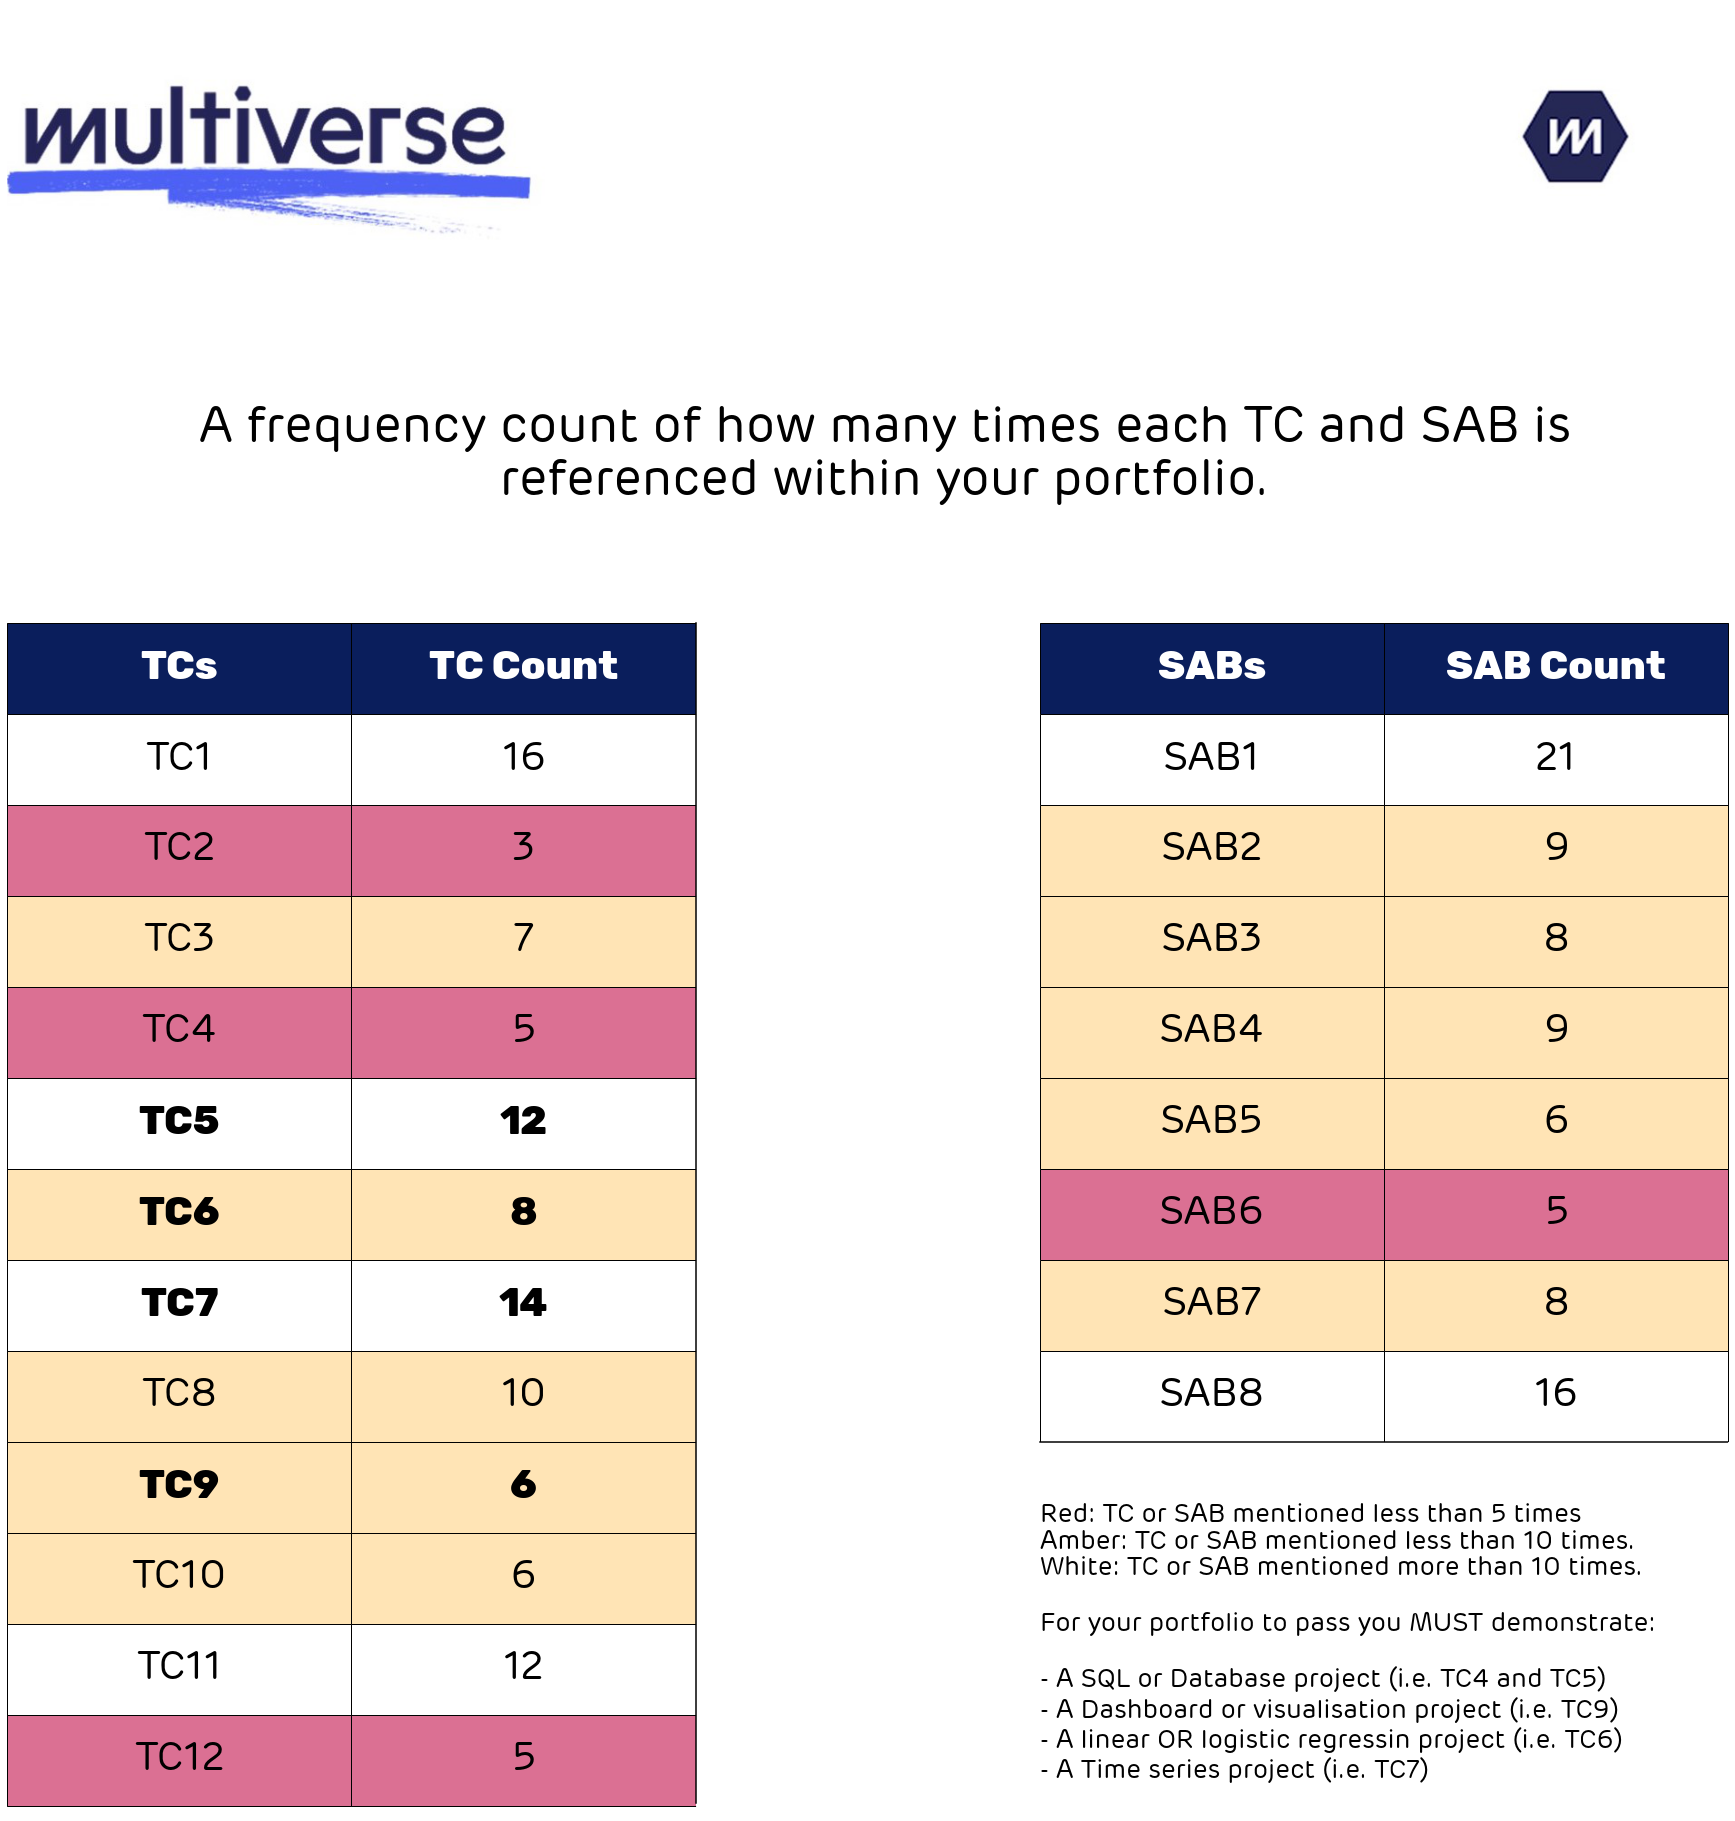

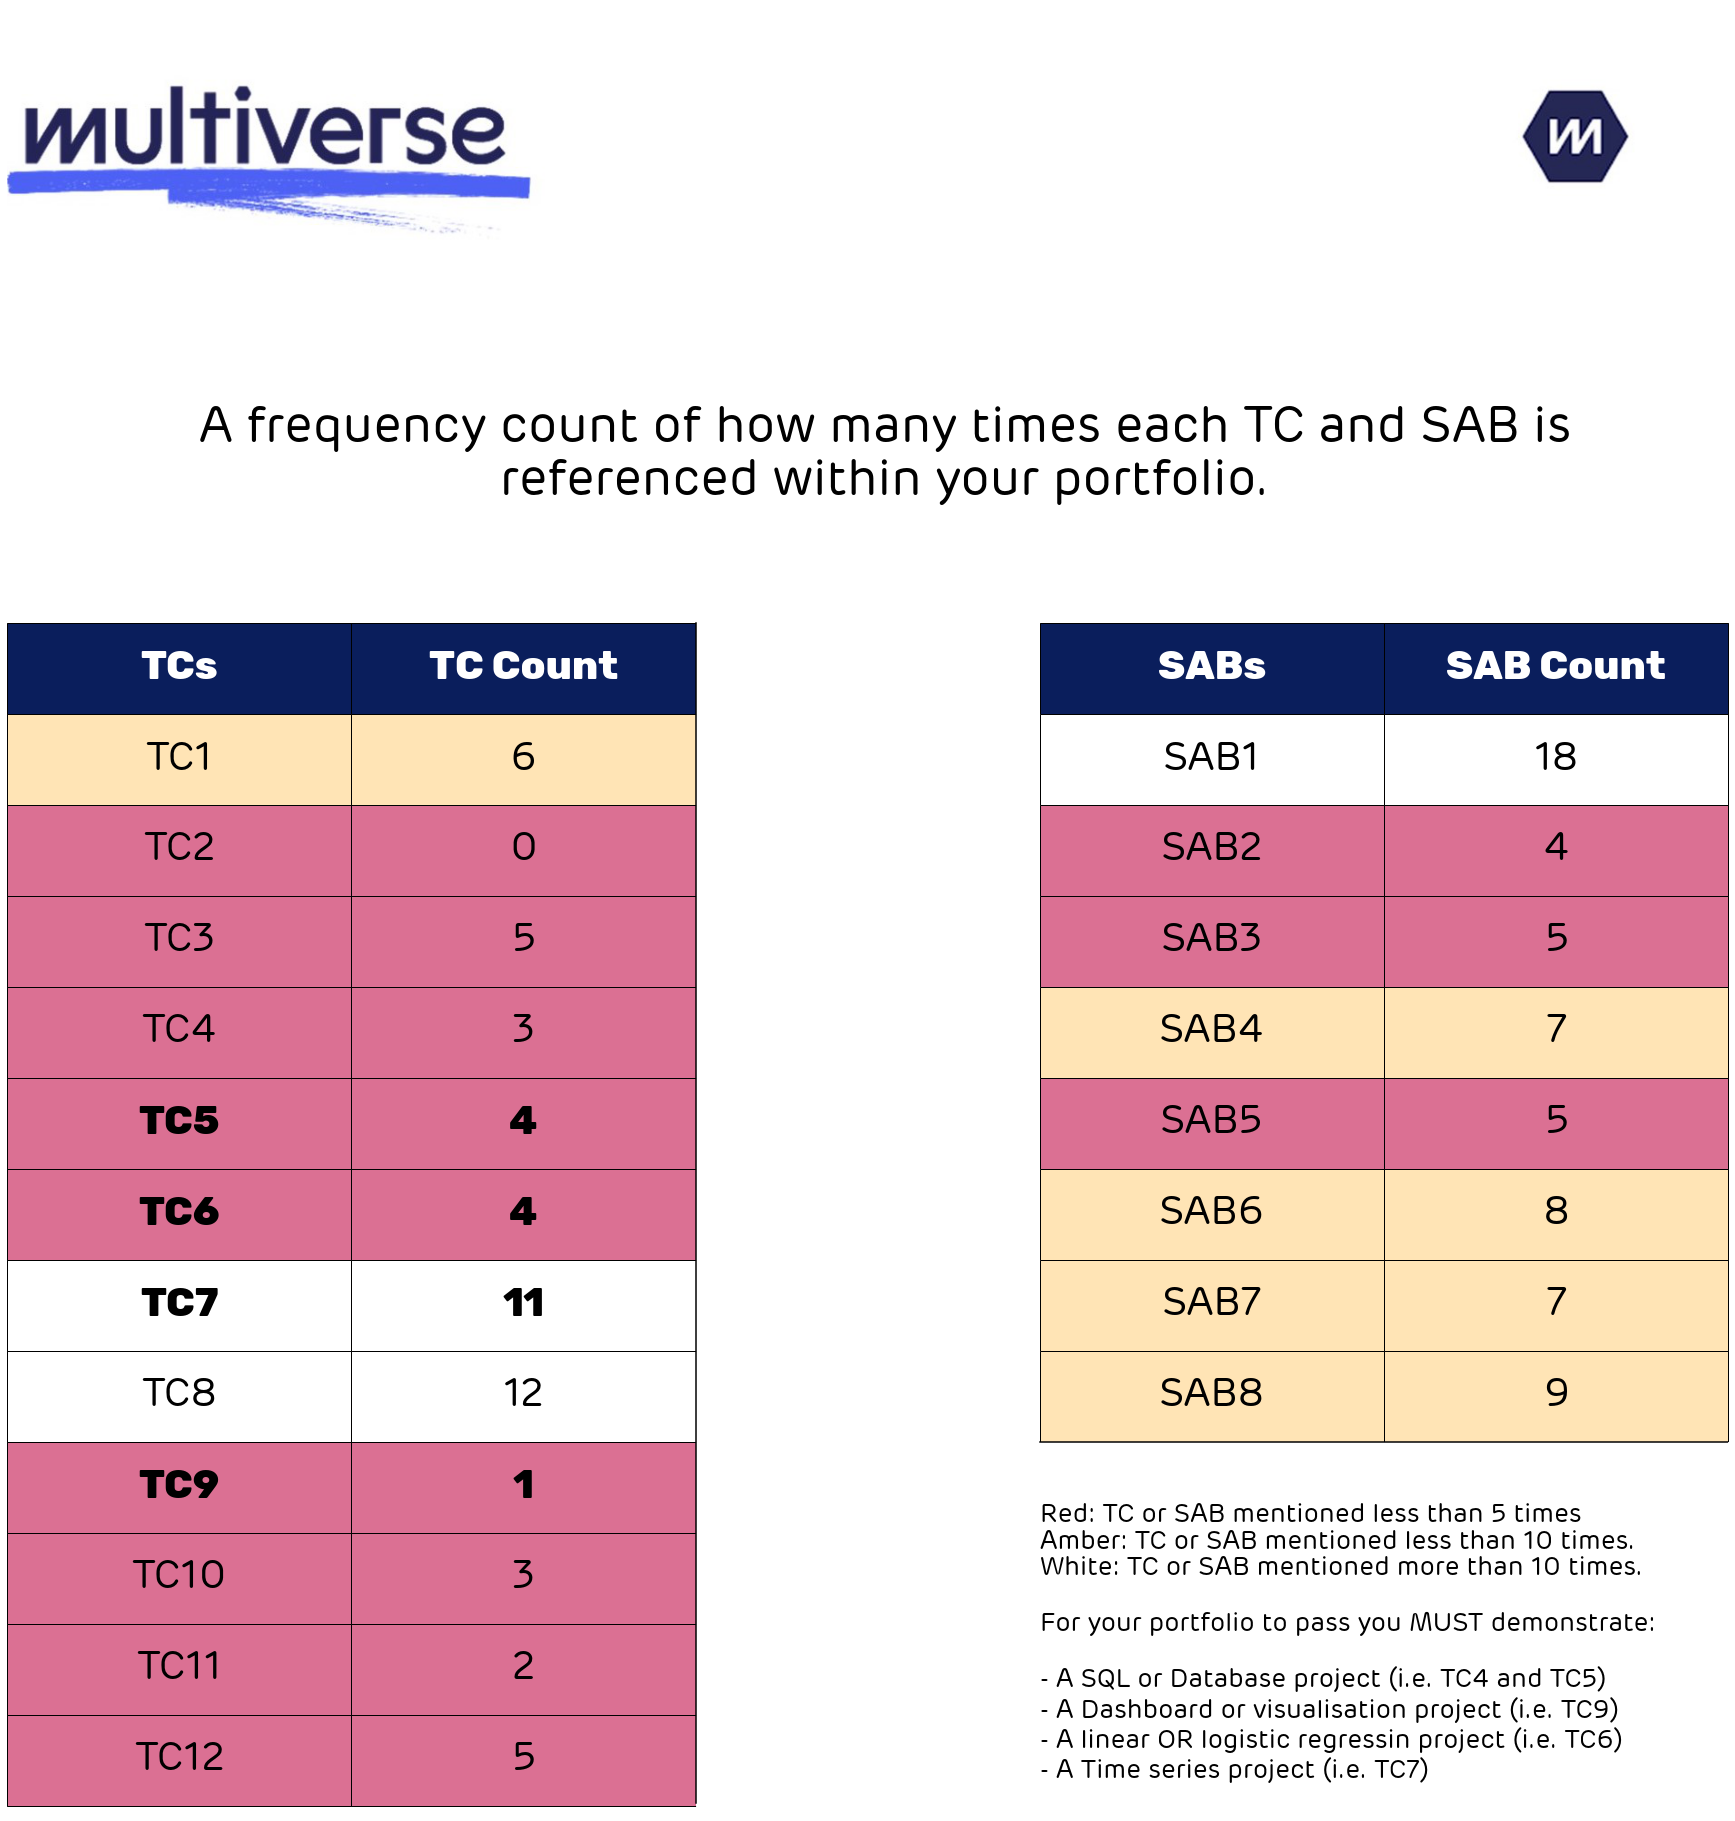

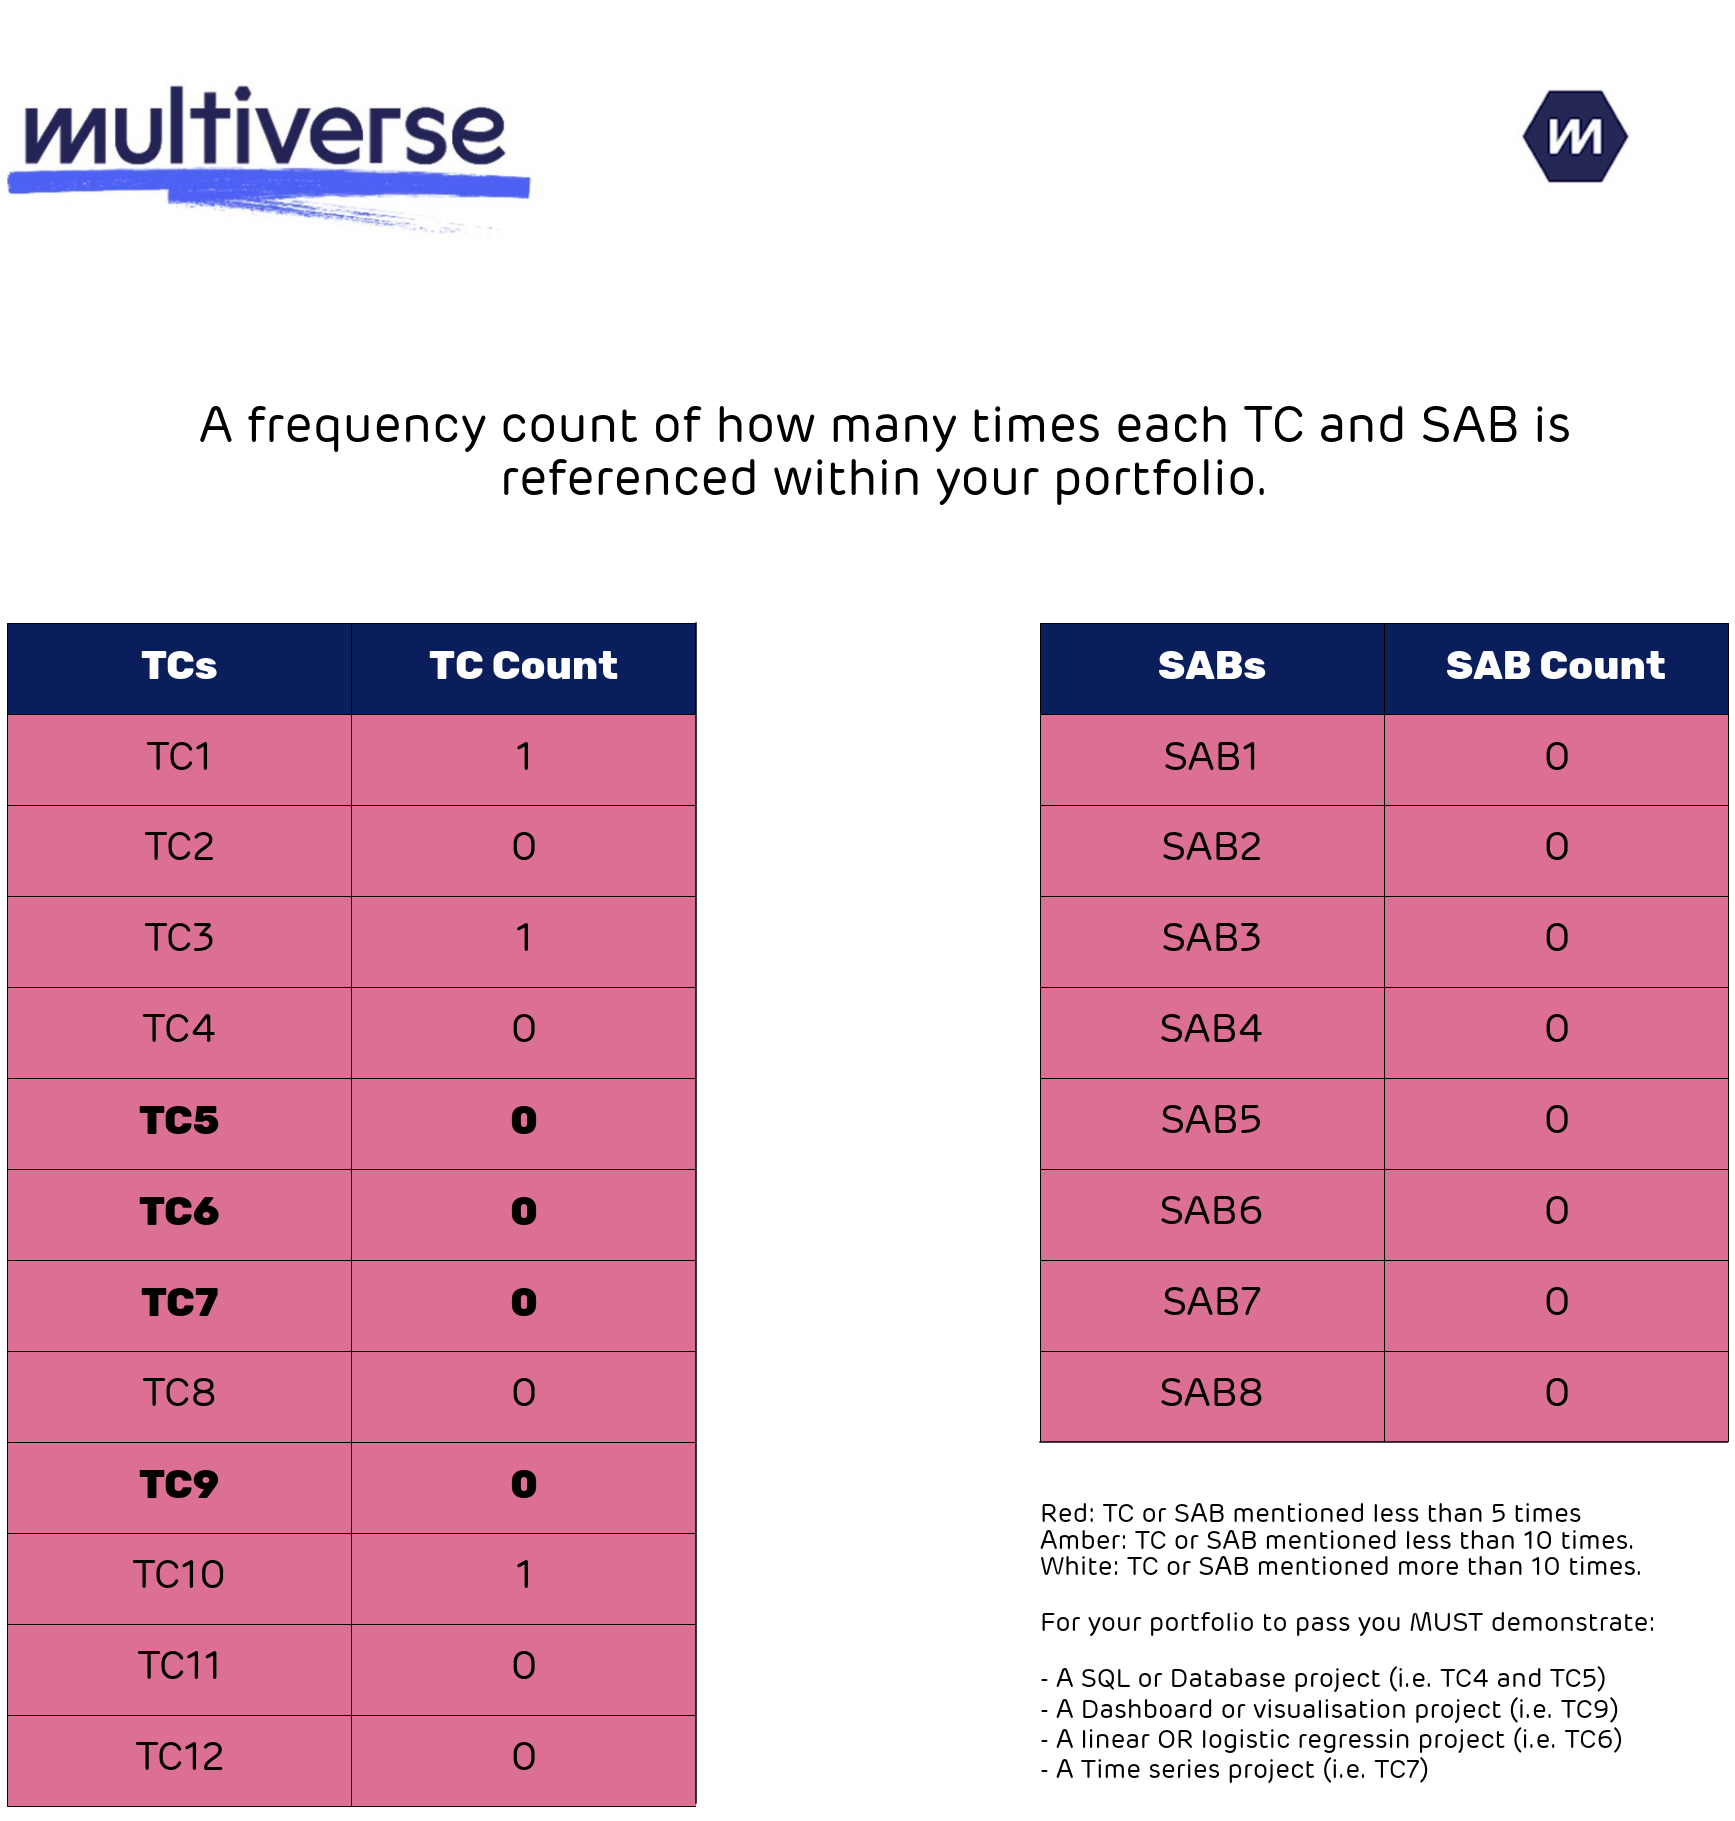

In [12]:
for p in ST_checker['Portfolio']: 
    standards_plot(portfolio = p, save = True)